In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

교차 검증 값 :  67.27160744678135


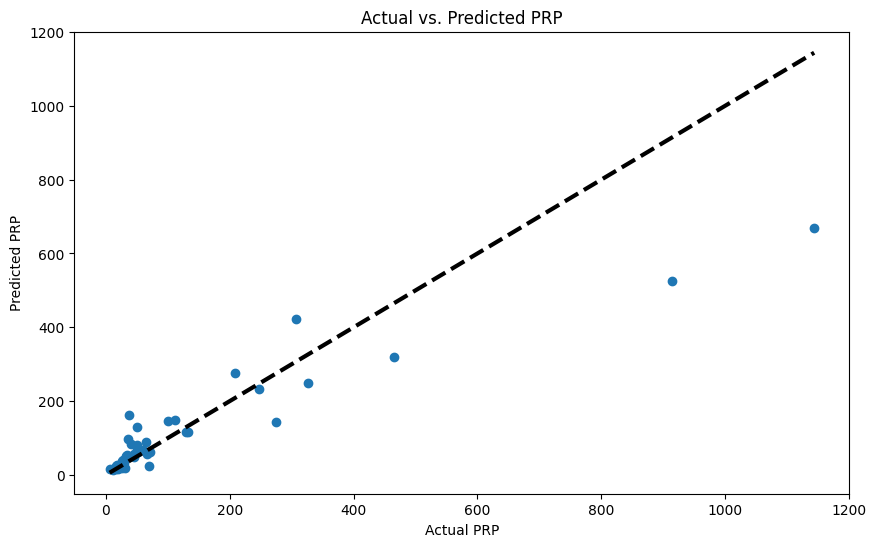

In [4]:
# 데이터셋을 로드하여 데이터프레임으로 저장한다
data = pd.read_csv('machine.data_update.csv')

# 데이터 전처리
# 데이터프레임을 원-핫 인코딩으로 변환한다.
# 데이터프레임 내의 범주형 변수를 더미 변수로 변환한다.
data = pd.get_dummies(data)

# 특성과 타겟 변수를 분리한다.
# X는 특성(독립 변수)을 나타내며, 'PRP'와 'ERP' 열을 제외한 모든 열로 구성된다.
# y는 타겟 변수(종속 변수)를 나타내며, 'PRP' 열의 값을 가진다.
X = data.drop(['PRP', 'ERP'], axis=1)
y = data['PRP']

# 파이프라인 설정을 통해 데이터 전처리와 모델 훈련 과정을 하나의 객체로 만든다.
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 데이터 스케일링 / StandardScaler를 사용한다.
    ('regressor', LinearRegression())  # 선형 회귀 모델 / LinearRegreession를 사용한다.
])

# 데이터를 훈련 데이터와 테스트 데이터로 분할한다.
# 테스트 데이터는 전체 데이터의 20%로 설정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프라인을 X_train과 y_train을 사용하여 훈련시킨다.
pipeline.fit(X_train, y_train)

# 교차 검증으로 모델을 평가한다.
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# 데이터를 5-fold cross-validation으로 분할하여 평가한다.
# 평가 지표로 평균 제곱 오차의 음수값을 사용한다. cv_scores를 사용해 양의 값으로 변환하고,
# nq.sqrt()를 사용하여 RMSE를 계산한다.
cv_rmse_scores = np.sqrt(-cv_scores)
print('교차 검증 값 : ', cv_rmse_scores.mean())

# 예측 결과를 시각화한다.
# 학습된 모델을 사용해 테스트 데이터 X_test에 대한 예측값 y_pred를 계산하고
# 실제값 y_test와 비교하여 산포도를 그린다.
y_pred = pipeline.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs. Predicted PRP')
plt.show()


In [13]:
# 하이퍼파라미터 그리드를 설정한다.
param_grid = {
    'regressor__fit_intercept': [True, False]
}

# GridSearchCV를 설정한다.
# 주어진 파이프라인과 하이퍼파라미터 그리드를 사용하여 교차 검증을 통해 최적의 모델을 찾는다.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# GridSearchCV를 사용하여 훈련시킨다.
grid_search.fit(X_train, y_train)

# 최적의 모델을 찾는다.
best_model = grid_search.best_estimator_

# 최적의 모델로 테스트 데이터를 예측한다.
y_pred = best_model.predict(X_test)

# MSE, MAE, R^2 값을 계산한다.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE 값 : ', mse)
print('MAE 값 : ', mae)
print('결정계수 값 : ', r2)

MSE 값 :  11349.468372771495
MAE 값 :  51.150225538557564
결정계수 값 :  0.7770542144130487


교차 검증 R^2 값:  0.7966737591619767
MSE:  9559.632884581459
MAE:  36.94551324679863
R^2:  0.8122132426494073


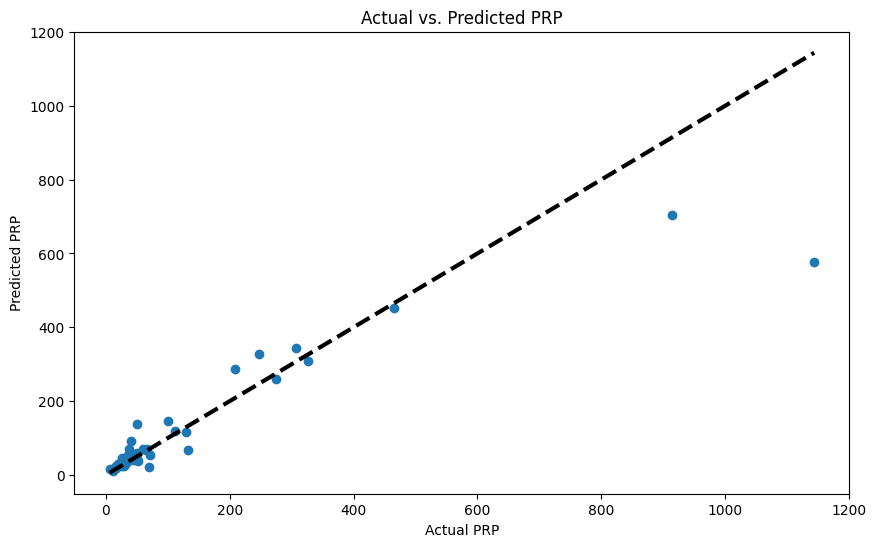

In [14]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 데이터셋을 로드하여 데이터프레임으로 저장한다
data = pd.read_csv('machine.data_update.csv')

# 데이터 전처리
# 데이터프레임을 원-핫 인코딩으로 변환한다.
# 데이터프레임 내의 범주형 변수를 더미 변수로 변환한다.
data = pd.get_dummies(data)

# 특성과 타겟 변수를 분리한다.
# X는 특성(독립 변수)을 나타내며, 'PRP'와 'ERP' 열을 제외한 모든 열로 구성된다.
# y는 타겟 변수(종속 변수)를 나타내며, 'PRP' 열의 값을 가진다.
X = data.drop(['PRP', 'ERP'], axis=1)
y = data['PRP']

# 파이프라인 설정을 통해 데이터 전처리와 모델 훈련 과정을 하나의 객체로 만든다.
# StandardScaler로 데이터를 스케일링 하고 RandomForestRegressor를 사용한다.
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 데이터 스케일링 / StandardScaler를 사용한다.
    ('regressor', RandomForestRegressor(random_state=42))  # 랜덤 포레스트 모델
])

# 랜덤 포레스트 모델의 하이퍼파라미터에 대해 그리드를 설정한다.
# max_features 파라미터는 에러를 방지한다.
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_features': ['sqrt', 'log2', 0.2, 0.5, 0.8],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV를 설정한다.
# 주어진 파이프라인과 하이퍼파라미터 그리드를 사용하여 교차 검증을 통해 최적의 모델을 찾는다.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# 데이터를 훈련 데이터와 테스트 데이터로 분할한다.
# 테스트 데이터는 전체 데이터의 20%로 설정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV를 사용하여 훈련시킨다.
grid_search.fit(X_train, y_train)

# 최적의 모델을 찾는다.
best_model = grid_search.best_estimator_

# 최적의 모델로 교차 검증 점수를 계산한다.
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print('교차 검증 R^2 값: ', cv_scores.mean())

# 최적의 모델로 테스트 데이터를 예측한다.
y_pred = best_model.predict(X_test)

# MSE, MAE, R^2 값을 계산한다.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE 값 : ', mse)
print('MAE 값 : ', mae)
print('결정 계수 값 : ', r2)

# 예측 결과를 시각화한다.
# 학습된 모델을 사용해 테스트 데이터 X_test에 대한 예측값 y_pred를 계산하고
# 실제값 y_test와 비교하여 산포도를 그린다.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs. Predicted PRP')
plt.show()


  VendorName ModelName  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0    adviser     32/60   125   256   6000   256     16    128  198  199
1     amdahl    470v/7    29  8000  32000    32      8     32  269  253
2     amdahl   470v/7a    29  8000  32000    32      8     32  220  253
3     amdahl   470v/7b    29  8000  32000    32      8     32  172  253
4     amdahl   470v/7c    29  8000  16000    32      8     16  132  132
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   3

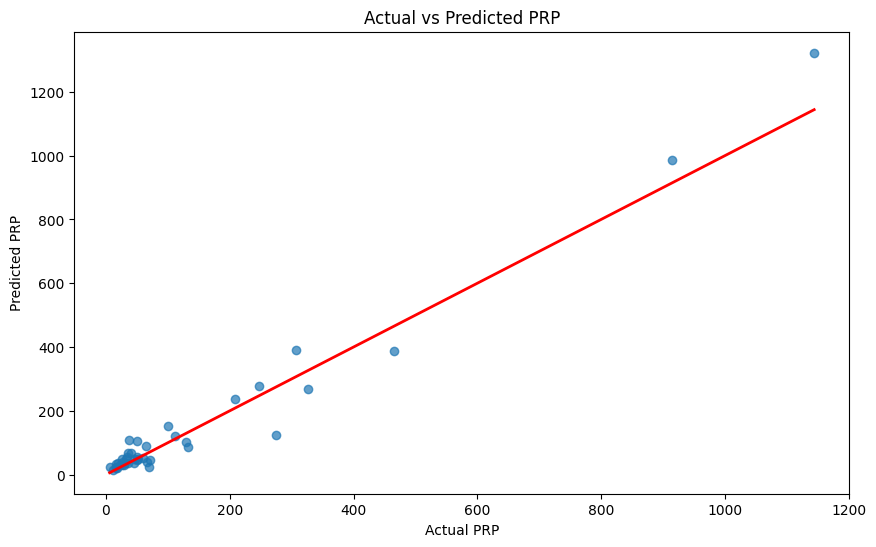

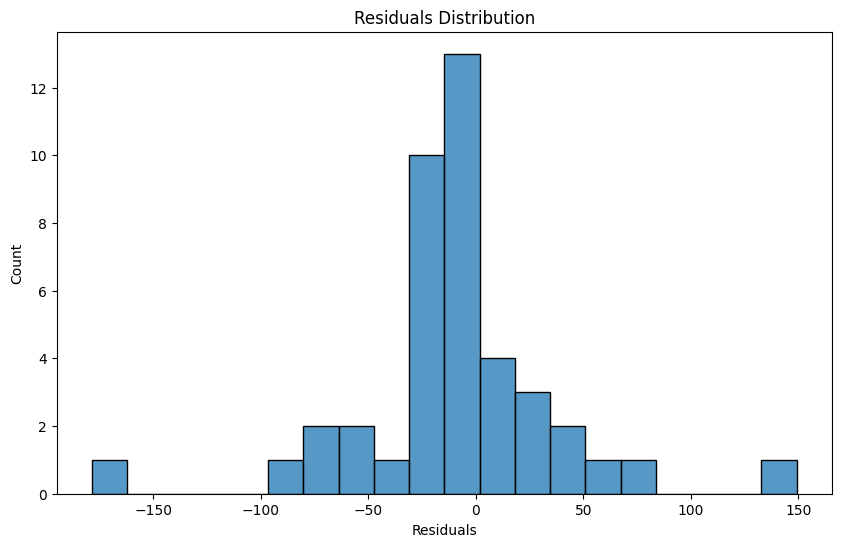

In [15]:
# 3-2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터셋을 로드하여 데이터프레임으로 저장한다.
file_path = 'machine.data_update.csv'
data = pd.read_csv(file_path)

# 데이터의 첫 5개 행을 확인한다.
print(data.head())

# 데이터의 정보를 확인한다.
print(data.describe())

# 데이터 전처리 과정
# 데이터셋에는 여러 가지 타입의 데이터가 있기 때문에 필요한 숫자형 데이터만 선택하여 data_numeric에 저장한다.
data_numeric = data.select_dtypes(include=[np.number])

# 숫자형 데이터의 결측치를 각 열의 평균 값으로 대체하여 결측치를 처리한다.
data_numeric.fillna(data_numeric.mean(), inplace=True)

# 특성(X)과 목표 변수(y)를 정의한다.
X = data_numeric.drop('PRP', axis=1) # 'PRP'열을 제외한 모든 열을 특성 'X'로 정의한다.
y = data_numeric['PRP'] # 'PRP'열을 목표 변수 'y'로 정의한다.

# 데이터를 훈련 데이터와 테스트 데이터로 분할한다.
# 테스트 데이터는 전체 데이터의 20%로 설정한다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터를 이용하여 선형 회귀 모델을 학습시킨다.
model = LinearRegression()
model.fit(X_train, y_train)

# 학습된 모델을 이용해 테스트 데이터인 X_test에 대한 예측을 한다.
y_pred = model.predict(X_test)

# 실제값과 예측값을 시각화한다.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7) # 실제 PRP값과 예측된 PRP값을 산포도로 표시한다.
plt.xlabel("Actual PRP")
plt.ylabel("Predicted PRP")
plt.title("Actual vs Predicted PRP")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
# 대각선으로 실제값과 예측값이 일치하는 선을 추가해 모델의 예측 정확도를 시각적으로 평가한다.
plt.show()

# 잔차를 시각화한다.
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred # 실제값과 예측값의 차이를 계산하여 잔차를 구한다.
sns.histplot(residuals) # 잔차의 분포를 히스토그램으로 시각화한다.
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()


In [22]:
#3번 성능 분석

# MSE
mse_1 = mean_squared_error(y_test, y_pred)

# MAE
mae_1 = np.mean(np.abs(y_test - y_pred))

# R^2
r2_1 = r2_score(y_test, y_pred)

# 교차 검증을 사용하여 RMSE 계산
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_rmse_mean_1 = cv_rmse_scores.mean()

# 성능 지표를 데이터프레임에 저장
performance_metrics_1 = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R^2', 'Cross Validation RMSE'],
    'Value': [mse_1, mae_1, r2_1, cv_rmse_mean_1]
})

print(performance_metrics_1)


                  Metric        Value
0                    MSE  2370.096375
1                    MAE    31.406219
2                    R^2     0.953442
3  Cross Validation RMSE    46.732081


In [23]:
# 4번 성능 분석
# MSE
mse_2 = mean_squared_error(y_test, y_pred)

# MAE
mae_2 = np.mean(np.abs(y_test - y_pred))

# R^2
r2_2 = r2_score(y_test, y_pred)

# 교차 검증을 사용하여 RMSE 계산
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
cv_rmse_mean_2 = cv_rmse_scores.mean()

# 성능 지표를 데이터프레임에 저장
performance_metrics_2 = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R^2', 'Cross Validation RMSE'],
    'Value': [mse_2, mae_2, r2_2, cv_rmse_mean_2]
})

print(performance_metrics_2)


                  Metric        Value
0                    MSE  2370.096375
1                    MAE    31.406219
2                    R^2     0.953442
3  Cross Validation RMSE    55.956122


1번 코드 성능 지표:
1번 MSE 값 :  2370.096374775837
1번 MAE 값 :  31.4062186755356
1번 R^2 값 :  0.9534424890368542
1번 RMSE 값 :  46.73208123577133
2번 코드 성능 지표:
2번 MSE 값 :  2370.096374775837
2번 MAE 값 :  31.4062186755356
2번 R^2 값 :  0.9534424890368542
2번 RMSE 값 :  55.95612157327952


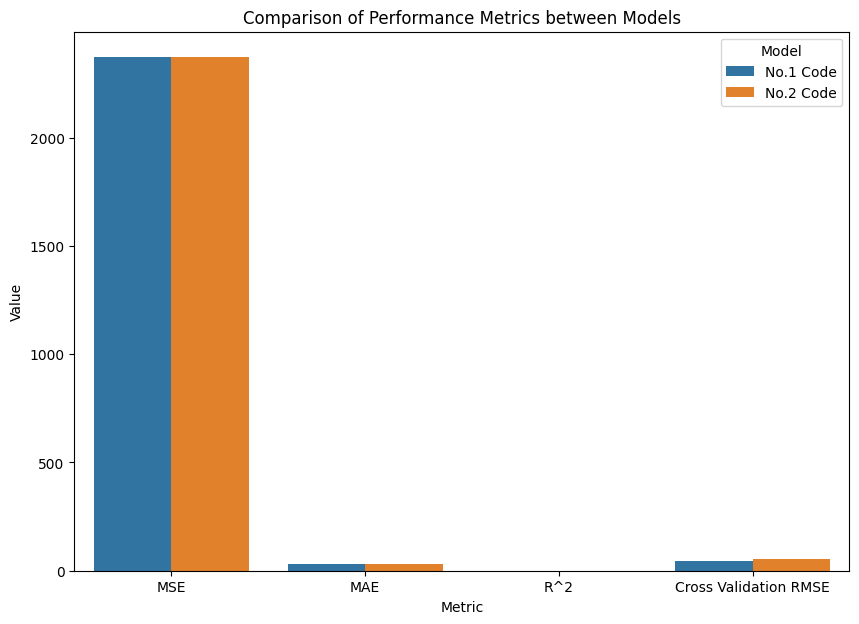

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# performance_metrics_1: 1번 코드의 성능 지표 데이터프레임
performance_metrics_1 = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R^2', 'Cross Validation RMSE'],
    'Value': [mse_1, mae_1, r2_1, cv_rmse_mean_1]
})

# performance_metrics_2: 2번 코드의 성능 지표 데이터프레임
performance_metrics_2 = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R^2', 'Cross Validation RMSE'],
    'Value': [mse_2, mae_2, r2_2, cv_rmse_mean_2]
})

# 데이터프레임을 피벗하여 학습 데이터와 테스트 데이터에 대한 성능 지표를 구분한다.
metrics_combined = pd.concat([performance_metrics_1.assign(Data='No.1 Code'), 
                             performance_metrics_2.assign(Data='No.2 Code')])

# 1번 코드의 성능 지표 출력
print("1번 코드 성능 지표:")
print('1번 MSE 값 : ', mse_1)
print('1번 MAE 값 : ', mae_1)
print('1번 R^2 값 : ', r2_1)
print('1번 RMSE 값 : ',cv_rmse_mean_1)

# 2번 코드의 성능 지표 출력
print("2번 코드 성능 지표:")
print('2번 MSE 값 : ', mse_2)
print('2번 MAE 값 : ', mae_2)
print('2번 R^2 값 : ', r2_2)
print('2번 RMSE 값 : ', cv_rmse_mean_2)

# 바 차트를 그린다.
plt.figure(figsize=(10, 7))
sns.barplot(x='Metric', y='Value', hue='Data', data=metrics_combined)
plt.title('Comparison of Performance Metrics between Models')
plt.ylabel('Value')
plt.legend(title='Model')
plt.show()
